# Bike Sharing Assignment

## Problem Statement

* A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.



* A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



* In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



* They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



The dataset consists of bike rentals on a specific day for years 2018 and 2019.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


# Importing necessary libraries

import os
import chardet

import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Model analysis and building libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# List of file encoding formats

for f in [files for files in os.listdir() if files.split('.')[-1] in ['csv', 'xlsx']]:
  print("file: {0} -----encoding: {1}".format(f, chardet.detect(open(f,'rb').read())['encoding']))

file: day.csv -----encoding: ascii


# Data Understanding

In [3]:
# Reading the data

df = pd.read_csv('day.csv')

In [4]:
df.shape

(730, 16)



> There are 730 rows in bike sharing dataset

> We have 16 features

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking for NULL values and feature data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Distribution of features data types
df.dtypes.value_counts()

int64      11
float64     4
object      1
dtype: int64

In [8]:
# Feature Anlaysis
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,730,NaN,NaN,NaN,365.5,210.877,1,183.25,365.5,547.75,730
dteday,730,730,10-04-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,730,NaN,NaN,NaN,2.49863,1.11018,1,2,3,3,4
yr,730,NaN,NaN,NaN,0.5,0.500343,0,0,0.5,1,1
mnth,730,NaN,NaN,NaN,6.52603,3.45022,1,4,7,10,12
holiday,730,NaN,NaN,NaN,0.0287671,0.167266,0,0,0,0,1
weekday,730,NaN,NaN,NaN,2.99726,2.00616,0,1,3,5,6
workingday,730,NaN,NaN,NaN,0.683562,0.465405,0,0,1,1,1
weathersit,730,NaN,NaN,NaN,1.39452,0.544807,1,1,1,2,3
temp,730,NaN,NaN,NaN,20.3193,7.50673,2.42435,13.8119,20.4658,26.8806,35.3283


# Data Preprocessing

We have categorical features Season, Month, Weekday, Weather situation, Workingday, Holiday, Weekday. 

> `Workingday` , `Holiday` , `Weekday` have binary numerical values

> But `Season`, `Month`, `Weekday`, `Weather Situation` are nominal features where assigning increasing numerical values to them is not apt.

We need to change the datatypes for nominal features

In [9]:
# Category dictionary 

category_dict = {'season' : {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'},
 'mnth' : {1 : 'january', 2 : 'february', 3: 'march', 4:'april',
           5 : 'may', 6 : 'june', 7 : 'july', 8 : 'august',
           9 : 'september', 10 : 'october', 11 : 'november', 12 : 'december'},
 'weekday' : {0 : 'sunday', 1 : 'monday', 2 : 'tuesday', 3 : 'wednesday',
              4 : 'thursday', 5 : 'friday', 6 : 'saturday'},
 'weathersit' : { 
      1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
	    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
	    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
	    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
      }
 }

In [10]:
df_labeled = df.copy()

# Replacing the numerical values with categorical string values
df_labeled = df_labeled.replace(category_dict)

In [11]:
df_labeled.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dropping Unnecesary Features

`instant` feature doesn't have any relationship with data as its only the sequence list of records, so it can be dropped

`dteday` feature can be dropped as we have month, weekday and yr details as different columns

`temp` both temp and atemp are almost similar and one can be dropped

`casual` and `registered` are dropped as `cnt` feature is aggregate sum of these two features

In [12]:
# features which can be dropped
drop_columns = ['instant', 'dteday', 'temp','casual', 'registered']


df_labeled.drop(drop_columns, inplace=True, axis=1)

In [13]:
df_labeled.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,1600


# Data Visualization

## Univariate Analysis

In [14]:
# Function to generate Pie Plots

def pie_plot(title=None, legend=None, data=None):
  plt.pie(data, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.1)
  plt.legend(legend, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
  circle = plt.Circle((0,0), 0.7, color='white')
  p = plt.gcf()
  p.gca().add_artist(circle)
  plt.axis('equal')
  plt.tight_layout()
  plt.title(title, fontsize=16)

In [15]:
# Changing datatype of binary numerical features for plotting categorical charts

df_category = df_labeled.copy()

df_category['yr'] = df_category['yr'].astype('str')
df_category['workingday'] = df_category['workingday'].astype('str')
df_category['holiday'] = df_category['holiday'].astype('str')

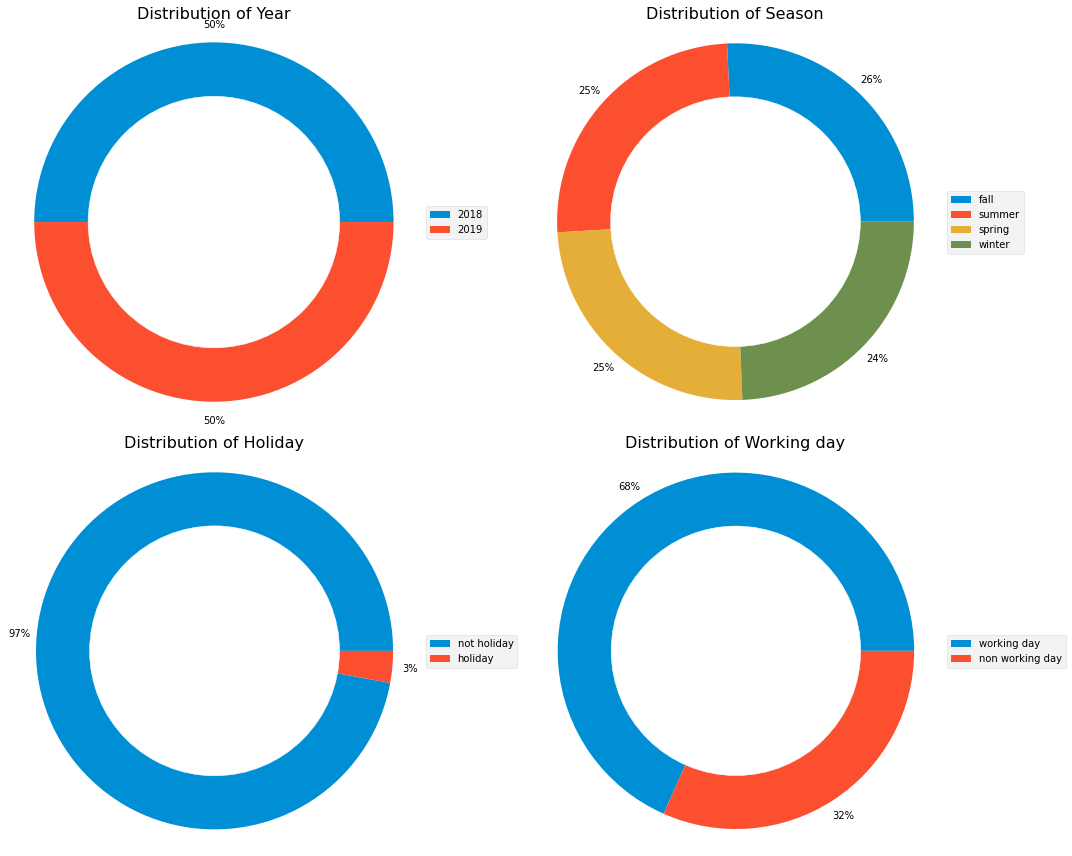

In [16]:
# Distribution of Features (year, Season, Holiday, Working day)
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
pie_plot('Distribution of Year',legend=['2018','2019'], data=df_labeled['yr'].value_counts())
plt.subplot(2,2,2)
pie_plot('Distribution of Season',legend=df_labeled['season'].value_counts().index,data=df_labeled['season'].value_counts())
plt.subplot(2,2,3)
pie_plot('Distribution of Holiday',legend=['not holiday', 'holiday'],data=df_labeled['holiday'].value_counts())
plt.subplot(2,2,4)
pie_plot('Distribution of Working day',legend=['working day', 'non working day'],data=df_labeled['workingday'].value_counts())

* Distribution of Seasons in dataset is almost equal
* Ditribution of Holidays shows that they are few records of holidays 
* Distribution of Working year in dataset is almost similar 

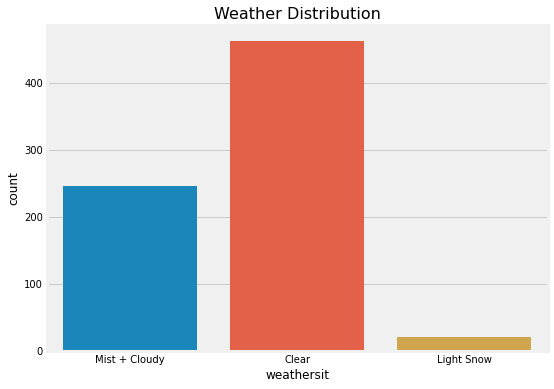

In [17]:
# Weather Distribution

plt.figure(figsize=(8,6))
X  = df_labeled['weathersit'].str.split(',').str[0]
ax = sns.countplot(x=X)
plt.title('Weather Distribution', fontsize=16)
plt.show()

Most of the days the weather is Clear

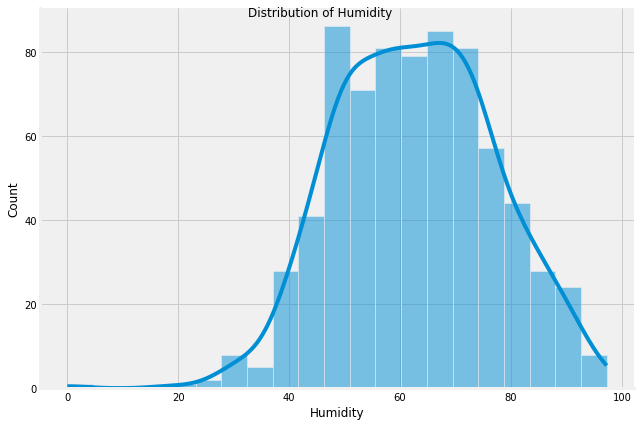

In [18]:
# Distribution of Humidity

ax = sns.displot(df_labeled, x="hum", kind='hist', kde=True, height=6, aspect=1.5)
ax.set_axis_labels("Humidity")
ax.fig.suptitle('Distribution of Humidity')
plt.show()

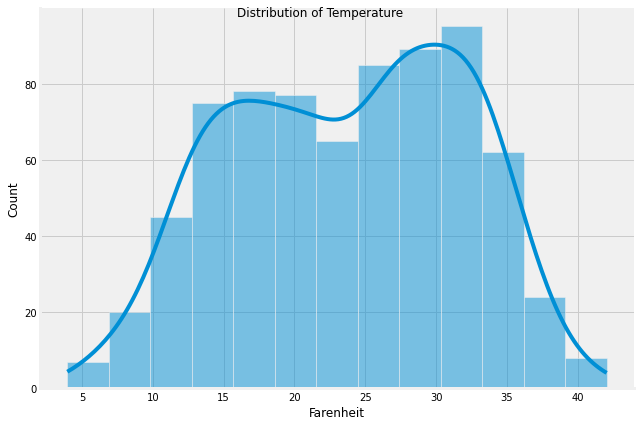

In [19]:
# Distribution of Temperature

ax = sns.displot(df_labeled, x="atemp", kind='hist', kde=True, height=6, aspect=1.5)
ax.set_axis_labels("Farenheit")
ax.fig.suptitle('Distribution of Temperature')
plt.show()

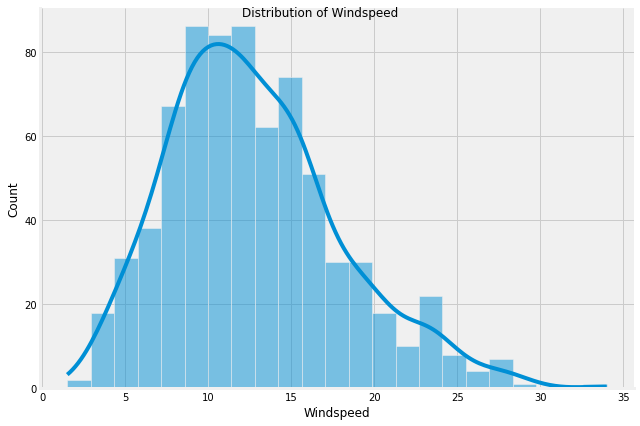

In [20]:
# Distribution of Windspeed

ax = sns.displot(df_labeled, x="windspeed", kind='hist', kde=True, height=6, aspect=1.5)
ax.set_axis_labels("Windspeed")
ax.fig.suptitle('Distribution of Windspeed')
plt.show()

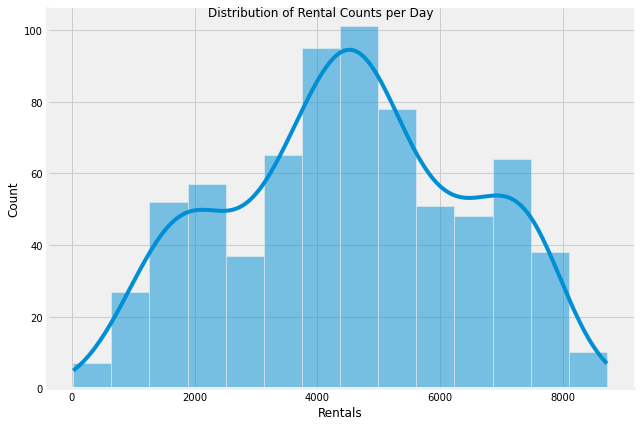

In [21]:
# Distribution of Rental Counts per Day

ax = sns.displot(df_labeled, x="cnt", kind='hist', kde=True, height=6, aspect=1.5)
ax.set_axis_labels("Rentals")
ax.fig.suptitle('Distribution of Rental Counts per Day')
plt.show()

## Bivariate Analysis


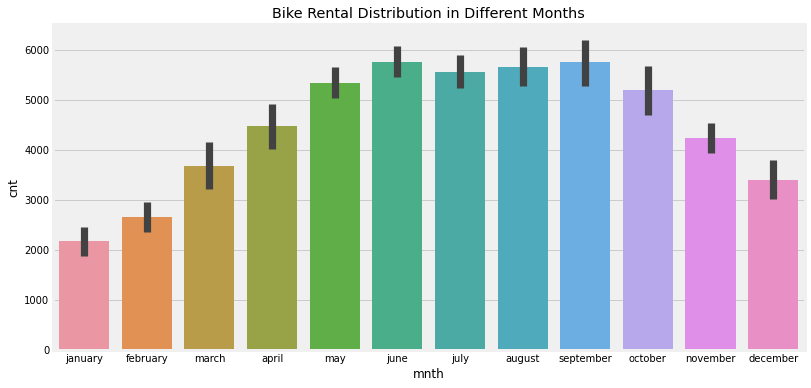

In [22]:
# Distribution of Daily bike rentals among different months

plt.figure(figsize=(12,6))
sns.barplot(x=df_labeled['mnth'], y=df_labeled['cnt'])
plt.title('Bike Rental Distribution in Different Months')
plt.show()

The Rentals are in peak during June - September Months and less during December - February

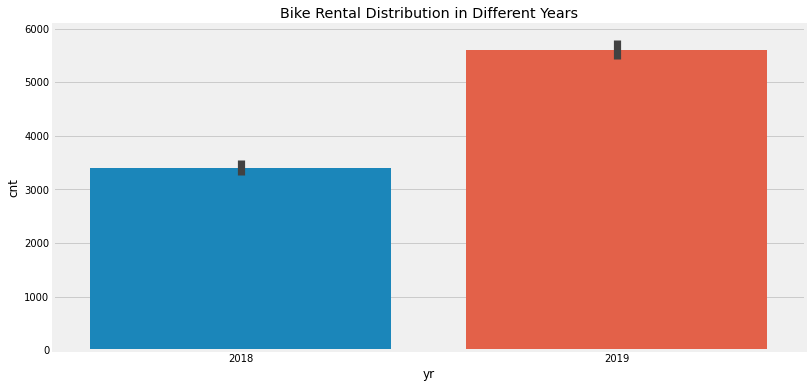

In [23]:
# Rental Distribution in 2019 and 2018

plt.figure(figsize=(12,6))
df_category = df_category.replace({'yr': {'0':'2018', '1':'2019'}})
sns.barplot(x=df_category['yr'], y=df_category['cnt'])
plt.title('Bike Rental Distribution in Different Years')
plt.show()

Rental Demand Increase in year 2019 as business grows with years

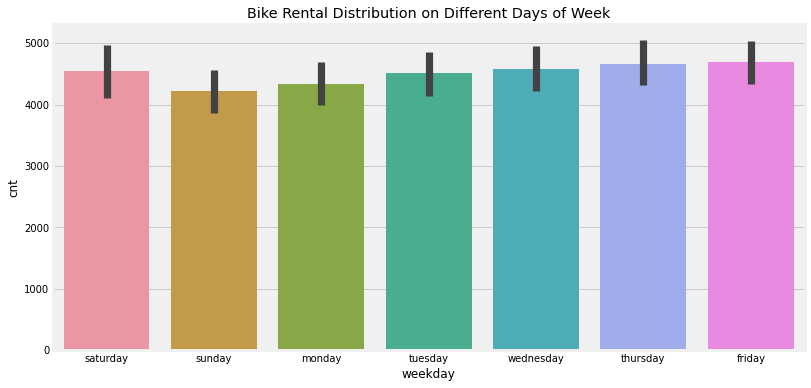

In [24]:
# Rental Distribution in Weekdays

plt.figure(figsize=(12,6))
sns.barplot(x=df_labeled['weekday'], y=df_labeled['cnt'])
plt.title('Bike Rental Distribution on Different Days of Week')
plt.show()

Demand is less comparitively on Sundays and Mondays

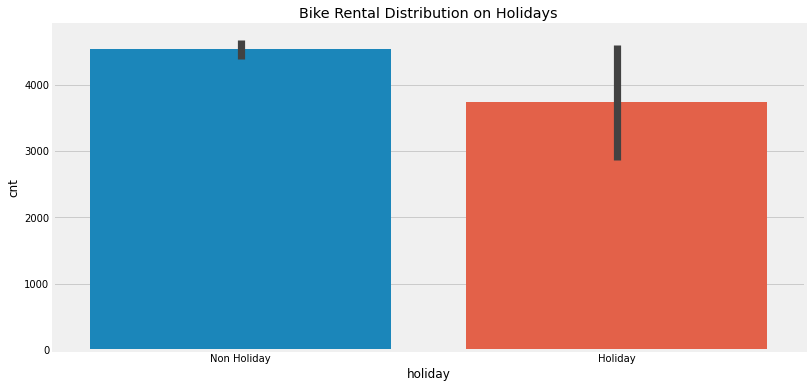

In [25]:
# Rental Distribution on holidays

plt.figure(figsize=(12,6))
df_category = df_category.replace({'holiday': {'1':'Holiday', '0':'Non Holiday'}})
sns.barplot(x=df_category['holiday'], y=df_category['cnt'])
plt.title('Bike Rental Distribution on Holidays')
plt.show()

Rentals are high on Non Holiday days

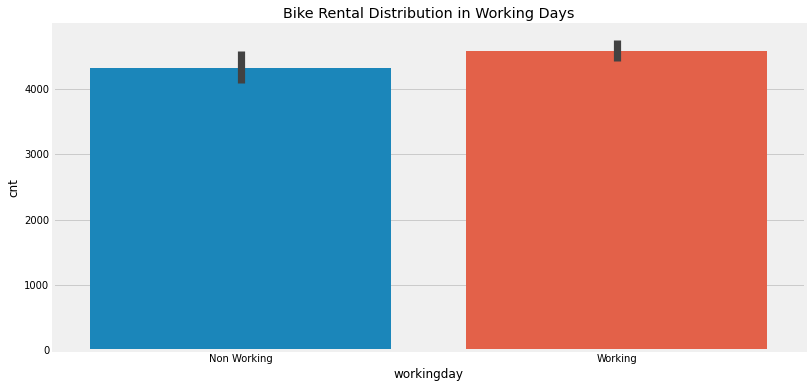

In [26]:
# Rental Distribution in working days

plt.figure(figsize=(12,6))
df_category = df_category.replace({'workingday': {'0':'Non Working', '1':'Working'}})
sns.barplot(x=df_category['workingday'], y=df_category['cnt'])
plt.title('Bike Rental Distribution in Working Days')
plt.show()

Rentals are high on Working days

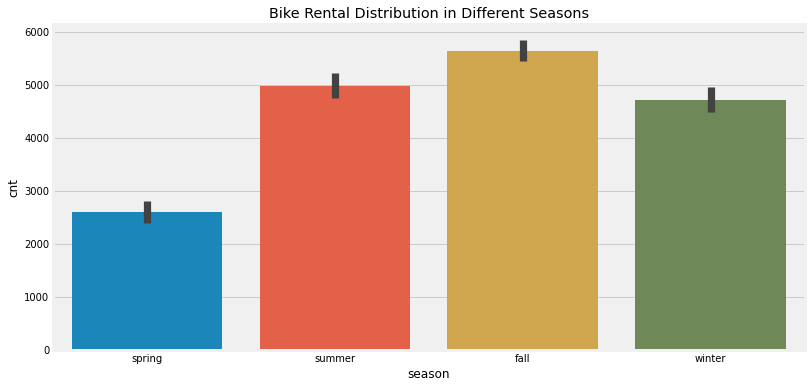

In [27]:
# Rental Distribution on different seasons

plt.figure(figsize=(12,6))
sns.barplot(x=df_category['season'], y=df_category['cnt'])
plt.title('Bike Rental Distribution in Different Seasons')
plt.show()

Rentals are more in Summer and Fall

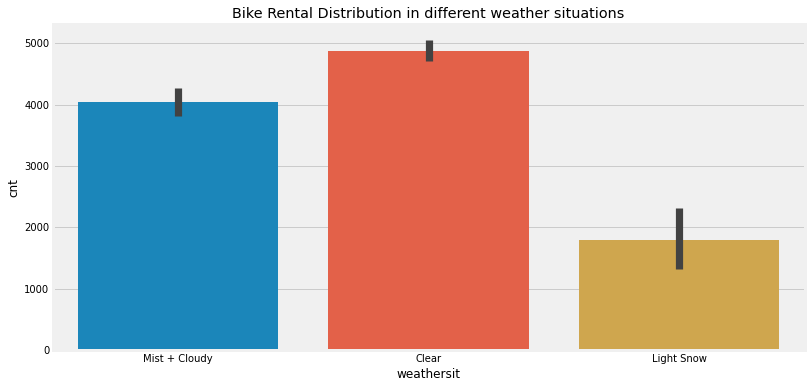

In [28]:
# Rental Distribution in different weather situations

plt.figure(figsize=(12,6))
sns.barplot(x=df_category['weathersit'].str.split(',').str[0], y=df_category['cnt'])
plt.title('Bike Rental Distribution in different weather situations')
plt.show()

Rentals are less during Snows and high on clear weather

## Multivariate Analysis

<Figure size 432x432 with 0 Axes>

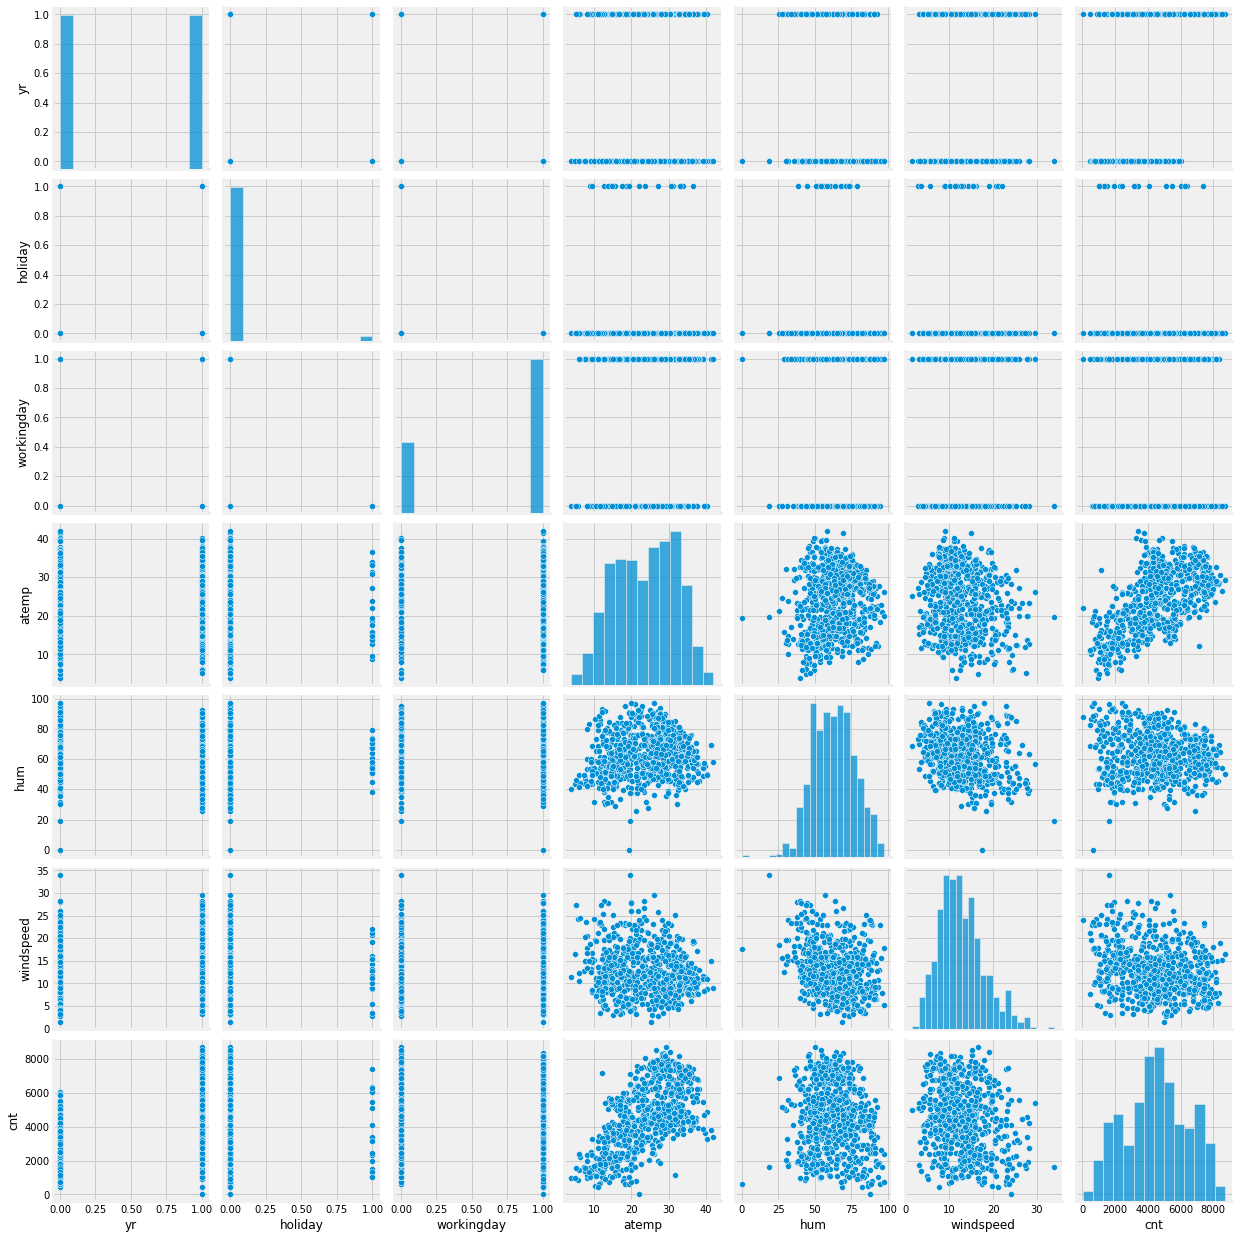

In [29]:
# Pairplots for Continous features
plt.figure(figsize=(6,6))
ax = sns.pairplot(df_labeled)
plt.show()

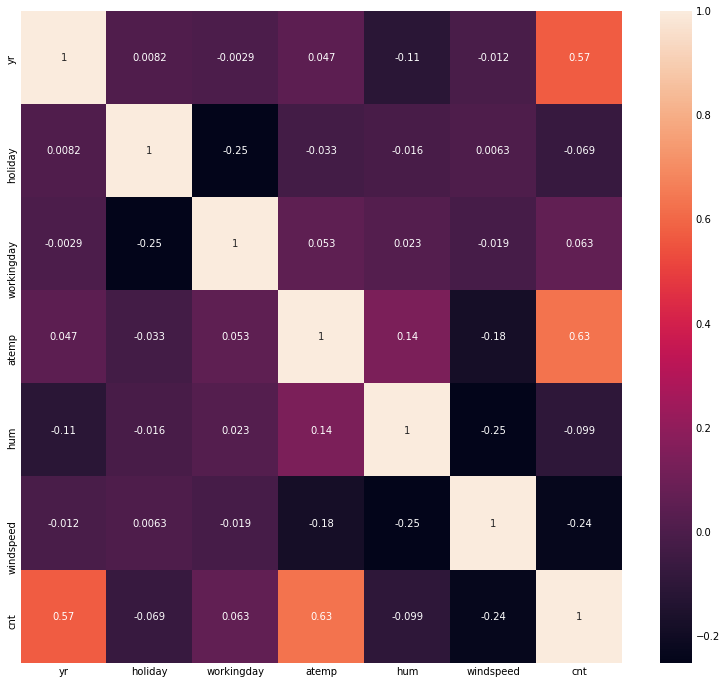

In [30]:
# HeatMap

plt.figure(figsize=(12,12))
sns.heatmap(df_labeled.corr(),annot=True)
plt.show()

* There is a fair correlation with Year and Demand
* Correlation between Temperature and Demand is also high

# Model Building

## Features Encoding to dummy variables

Categorical variables are dummy encoded by dropping the first column to avoid collinearlity among them 

In [31]:
# dummy values are encoded for nominal values

dummy_encoding = pd.get_dummies(df_labeled[['season','mnth', 'weekday', 'weathersit']], drop_first=True)
df_labeled['weathersit'].value_counts()
df_cleaned = pd.concat([df_labeled, dummy_encoding], axis=1)
df_cleaned = df_cleaned.drop(['season','mnth','weekday','weathersit'] , axis=1)

In [32]:
df_cleaned.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Train Test Split

The overall dataset size has around 700 records. Comparitively its a small dataset so we will try to split data into 4:1 ratio. 

> Here we will consider 20% data as test set

In [33]:
np.random.seed(0)

X_train, X_test = train_test_split(df_cleaned, test_size=0.2,  random_state=5)

## Normalizing Features

Different features have different units of measurement and hence few features contains high valued records and few features contains low valued records

> We are going to use MinMax Scaler to normalize the features

> Normalizing helps to reach minima easily

In [34]:
scaler = MinMaxScaler()

# Scaling high valued features to range of [0,1] using MinMax Saler
X_train[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(X_train[['atemp','hum','windspeed','cnt']])

## Dividing Data to Dependent and Independent Variable

> `cnt` is considered as Target Variable 

In [35]:
# Rental count is a target variabla

y_train = X_train.pop('cnt')

## RFE for Variable Selection 

In [36]:
X_train.shape

(584, 28)

We have `28` features for model building. We will reduce the features to `15` using RFE

In [37]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Selecting 15 features through RFE 
features = RFE(regressor, 15)
rfe = features.fit(X_train, y_train)

In [38]:
rfe_list = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_list 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_august', False, 7),
 ('mnth_december', True, 1),
 ('mnth_february', False, 3),
 ('mnth_january', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 8),
 ('mnth_march', False, 11),
 ('mnth_may', False, 6),
 ('mnth_november', True, 1),
 ('mnth_october', False, 10),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 5),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 13),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  False,
  4)]

In [39]:
# list of only top 15 featuers 
rfe_selected = [r[0] for r in rfe_list if r[1] == True]
rfe_selected

['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_december',
 'mnth_july',
 'mnth_november',
 'mnth_september',
 'weekday_saturday',
 'weekday_sunday',
 'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']

In [40]:
# Slicing the Train Set with selected features

X_train_rfe = X_train.copy()

X_train_rfe = X_train_rfe[rfe_selected]

Reggression Results with all Results

In [41]:
#Build a linear model

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.70e-209
Time:                        17:11:02   Log-Likelihood:                 571.93
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     569   BIC:                            -1048.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.3414      0.024     13.948      0.000       0.293       0.389
yr                                                                                                     0.2283      0.008     29.660      0.000       0.213       0.243
holiday                                                                                                0.0699      0.021      3.333      0.001       0.029       0.111
workingday                                                                                             0.0991      0.009     10.968      0.000       0.081       0.117
atemp                                                                                                  0.4846      0.031     15.878      0.000       0.425       0.545
hum                                                                                                   -0.3058      0.029    -10.385      0.000      -0.364      -0.248
windspeed                                                                                             -0.1487      0.022     -6.778      0.000      -0.192      -0.106
season_spring                                                                                         -0.1208      0.014     -8.393      0.000      -0.149      -0.093
season_winter                                                                                          0.0716      0.013      5.344      0.000       0.045       0.098
mnth_december                                                                                         -0.0333      0.016     -2.034      0.042      -0.065      -0.001
mnth_july                                                                                             -0.0598      0.016     -3.816      0.000      -0.091      -0.029
mnth_november                                                                                         -0.0382      0.018     -2.133      0.033      -0.073      -0.003
mnth_september                                                                                         0.0637      0.015      4.286      0.000       0.034       0.093
weekday_saturday                                                                                       0.1160      0.011     10.260      0.000       0.094       0.138
weekday_sunday                                                                                         0.0564      0.012      4.841      0.000       0.034       0.079
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Ra

> All p values are significant 

In [42]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,43.78
12,weekday_saturday,9.78
13,weekday_sunday,8.61
3,atemp,3.08
6,season_spring,2.60
1,holiday,2.50
7,season_winter,2.25
10,mnth_november,1.70
9,mnth_july,1.32
8,mnth_december,1.31


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>

> VIF for `workingday ` is too high and hence we will drop this feature

### Model 1

In [43]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('workingday', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.70e-209
Time:                        17:11:02   Log-Likelihood:                 571.93
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     569   BIC:                            -1048.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.4405      0.030     14.660      0.000       0.381       0.500
yr                                                                                                     0.2283      0.008     29.660      0.000       0.213       0.243
holiday                                                                                               -0.0292      0.025     -1.164      0.245      -0.079       0.020
atemp                                                                                                  0.4846      0.031     15.878      0.000       0.425       0.545
hum                                                                                                   -0.3058      0.029    -10.385      0.000      -0.364      -0.248
windspeed                                                                                             -0.1487      0.022     -6.778      0.000      -0.192      -0.106
season_spring                                                                                         -0.1208      0.014     -8.393      0.000      -0.149      -0.093
season_winter                                                                                          0.0716      0.013      5.344      0.000       0.045       0.098
mnth_december                                                                                         -0.0333      0.016     -2.034      0.042      -0.065      -0.001
mnth_july                                                                                             -0.0598      0.016     -3.816      0.000      -0.091      -0.029
mnth_november                                                                                         -0.0382      0.018     -2.133      0.033      -0.073      -0.003
mnth_september                                                                                         0.0637      0.015      4.286      0.000       0.034       0.093
weekday_saturday                                                                                       0.0169      0.011      1.542      0.124      -0.005       0.039
weekday_sunday                                                                                        -0.0427      0.012     -3.647      0.000      -0.066      -0.020
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.1815      0.025     -7.309      0.000      -0.230      -0.133
=============================================================================

In [44]:
# VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.58
2,atemp,12.74
4,windspeed,4.94
6,season_winter,2.79
5,season_spring,2.47
0,yr,2.01
9,mnth_november,1.80
8,mnth_july,1.44
7,mnth_december,1.40
10,mnth_september,1.21


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>


> `Holiday` has high p value around `0.245`

We will drop this feature

### Model 2


In [45]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('holiday', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.54e-210
Time:                        17:11:02   Log-Likelihood:                 571.23
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     570   BIC:                            -1053.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.4401      0.030     14.642      0.000       0.381       0.499
yr                                                                                                     0.2281      0.008     29.633      0.000       0.213       0.243
atemp                                                                                                  0.4848      0.031     15.882      0.000       0.425       0.545
hum                                                                                                   -0.3062      0.029    -10.397      0.000      -0.364      -0.248
windspeed                                                                                             -0.1485      0.022     -6.770      0.000      -0.192      -0.105
season_spring                                                                                         -0.1216      0.014     -8.448      0.000      -0.150      -0.093
season_winter                                                                                          0.0713      0.013      5.321      0.000       0.045       0.098
mnth_december                                                                                         -0.0331      0.016     -2.023      0.044      -0.065      -0.001
mnth_july                                                                                             -0.0608      0.016     -3.884      0.000      -0.092      -0.030
mnth_november                                                                                         -0.0387      0.018     -2.161      0.031      -0.074      -0.004
mnth_september                                                                                         0.0635      0.015      4.271      0.000       0.034       0.093
weekday_saturday                                                                                       0.0179      0.011      1.631      0.103      -0.004       0.039
weekday_sunday                                                                                        -0.0417      0.012     -3.567      0.000      -0.065      -0.019
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.1807      0.025     -7.277      0.000      -0.229      -0.132
==============================================================================
Omnibus:                       74.556   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.047
Skew:  

In [46]:
# VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.57
1,atemp,12.74
3,windspeed,4.94
5,season_winter,2.79
4,season_spring,2.47
0,yr,2.01
8,mnth_november,1.79
7,mnth_july,1.44
6,mnth_december,1.40
9,mnth_september,1.21


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>


> `weekday_saturday` has high p value of `0.103`

We will drop this feature

### Model 3

In [47]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('weekday_saturday', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     232.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.51e-211
Time:                        17:11:02   Log-Likelihood:                 569.87
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     571   BIC:                            -1057.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.4436      0.030     14.778      0.000       0.385       0.503
yr                                                                                                     0.2282      0.008     29.597      0.000       0.213       0.243
atemp                                                                                                  0.4836      0.031     15.822      0.000       0.424       0.544
hum                                                                                                   -0.3062      0.029    -10.382      0.000      -0.364      -0.248
windspeed                                                                                             -0.1478      0.022     -6.729      0.000      -0.191      -0.105
season_spring                                                                                         -0.1224      0.014     -8.498      0.000      -0.151      -0.094
season_winter                                                                                          0.0707      0.013      5.271      0.000       0.044       0.097
mnth_december                                                                                         -0.0328      0.016     -2.001      0.046      -0.065      -0.001
mnth_july                                                                                             -0.0605      0.016     -3.859      0.000      -0.091      -0.030
mnth_november                                                                                         -0.0387      0.018     -2.157      0.031      -0.074      -0.003
mnth_september                                                                                         0.0640      0.015      4.299      0.000       0.035       0.093
weekday_sunday                                                                                        -0.0447      0.012     -3.864      0.000      -0.067      -0.022
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.1802      0.025     -7.247      0.000      -0.229      -0.131
==============================================================================
Omnibus:                       70.915   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.450
Skew:                          -0.653   Prob(JB):                     4.35e-37
Kurtosis:                       5.276   Cond. No.                         17.2
================

In [48]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.51
1,atemp,12.73
3,windspeed,4.92
5,season_winter,2.79
4,season_spring,2.47
0,yr,2.01
8,mnth_november,1.79
7,mnth_july,1.44
6,mnth_december,1.40
9,mnth_september,1.21


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>


> `hum` has VIF of `15.51`

Hence we will drop the feature

### Model 4

In [49]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('hum', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.31e-190
Time:                        17:11:02   Log-Likelihood:                 519.38
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     572   BIC:                            -962.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2443      0.025      9.718      0.000       0.195       0.294
yr                                                                                                     0.2358      0.008     28.209      0.000       0.219       0.252
atemp                                                                                                  0.4507      0.033     13.612      0.000       0.386       0.516
windspeed                                                                                             -0.0971      0.023     -4.162      0.000      -0.143      -0.051
season_spring                                                                                         -0.1244      0.016     -7.928      0.000      -0.155      -0.094
season_winter                                                                                          0.0533      0.014      3.680      0.000       0.025       0.082
mnth_december                                                                                         -0.0407      0.018     -2.285      0.023      -0.076      -0.006
mnth_july                                                                                             -0.0431      0.017     -2.541      0.011      -0.076      -0.010
mnth_november                                                                                         -0.0250      0.019     -1.285      0.199      -0.063       0.013
mnth_september                                                                                         0.0412      0.016      2.568      0.010       0.010       0.073
weekday_sunday                                                                                        -0.0456      0.013     -3.626      0.000      -0.070      -0.021
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2493      0.026     -9.554      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       79.838   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.373
Skew:                          -0.778   Prob(JB):                     3.34e-36
Kurtosis:                       5.072   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [50]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.80
1,atemp,4.78
4,season_winter,2.41
0,yr,2.01
7,mnth_november,1.79
3,season_spring,1.76
6,mnth_july,1.38
5,mnth_december,1.37
8,mnth_september,1.20
9,weekday_sunday,1.15


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>

> `mnth_november` has high p value of `0.199` 

We will drop this feature

### Model 5

In [51]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('mnth_november', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     225.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.94e-191
Time:                        17:11:02   Log-Likelihood:                 518.54
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     573   BIC:                            -967.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2387      0.025      9.635      0.000       0.190       0.287
yr                                                                                                     0.2355      0.008     28.169      0.000       0.219       0.252
atemp                                                                                                  0.4601      0.032     14.230      0.000       0.397       0.524
windspeed                                                                                             -0.0984      0.023     -4.222      0.000      -0.144      -0.053
season_spring                                                                                         -0.1214      0.016     -7.820      0.000      -0.152      -0.091
season_winter                                                                                          0.0447      0.013      3.478      0.001       0.019       0.070
mnth_december                                                                                         -0.0328      0.017     -1.959      0.051      -0.066    7.88e-05
mnth_july                                                                                             -0.0446      0.017     -2.633      0.009      -0.078      -0.011
mnth_september                                                                                         0.0436      0.016      2.736      0.006       0.012       0.075
weekday_sunday                                                                                        -0.0454      0.013     -3.605      0.000      -0.070      -0.021
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2471      0.026     -9.483      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       74.414   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.725
Skew:                          -0.746   Prob(JB):                     2.27e-32
Kurtosis:                       4.939   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.69
2,windspeed,4.69
0,yr,2.00
3,season_spring,1.76
4,season_winter,1.55
6,mnth_july,1.38
5,mnth_december,1.23
7,mnth_september,1.18
8,weekday_sunday,1.15
9,"weathersit_Light Snow, Light Rain + Thundersto...",1.07


<u>VIF/P-value Rule: </u><br>
VIF should be less than 5 to avoid multi-collinearity<br>
P value should be less than 0.05 to avoid insignificance

<br>


> `mnth_december` has high p value of `0.051`

We will drop this variable

### Model 6

In [53]:
#Build a linear model

X_train_rfe = X_train_rfe.drop('mnth_december', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.03e-192
Time:                        17:11:02   Log-Likelihood:                 516.59
No. Observations:                 584   AIC:                            -1013.
Df Residuals:                     574   BIC:                            -969.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2325      0.025      9.439      0.000       0.184       0.281
yr                                                                                                     0.2354      0.008     28.083      0.000       0.219       0.252
atemp                                                                                                  0.4684      0.032     14.581      0.000       0.405       0.532
windspeed                                                                                             -0.0966      0.023     -4.135      0.000      -0.142      -0.051
season_spring                                                                                         -0.1218      0.016     -7.827      0.000      -0.152      -0.091
season_winter                                                                                          0.0396      0.013      3.135      0.002       0.015       0.064
mnth_july                                                                                             -0.0459      0.017     -2.702      0.007      -0.079      -0.013
mnth_september                                                                                         0.0451      0.016      2.830      0.005       0.014       0.076
weekday_sunday                                                                                        -0.0450      0.013     -3.566      0.000      -0.070      -0.020
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2469      0.026     -9.453      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       71.437   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.169
Skew:                          -0.730   Prob(JB):                     2.70e-30
Kurtosis:                       4.862   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.68
2,windspeed,4.68
0,yr,2.00
3,season_spring,1.72
5,mnth_july,1.38
4,season_winter,1.37
6,mnth_september,1.18
7,weekday_sunday,1.15
8,"weathersit_Light Snow, Light Rain + Thundersto...",1.07


# Residual Analysis

Predict the target value# using the train dataset

In [55]:
# Predicting with y value with finalised model

y_train_pred = lr_1.predict(X_train_lm)

In [56]:
residuals = y_train - y_train_pred

## Checking Assumption of Residual Analysis



### Assumption 1

Error Terms are Normally Distributed with Mean Zero

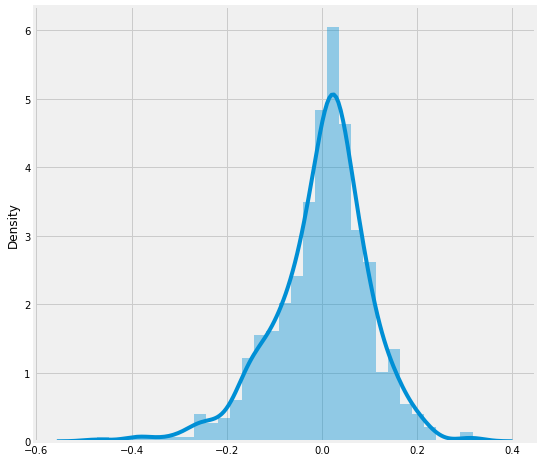

In [57]:
## Mean zero distribution

plt.figure(figsize=(8,8))
sns.distplot(residuals)

Errors are Normally Distributed with Mean nearly around zero

> This Assumption is hence valid

### Assumption 2

Error Terms are independent of each other

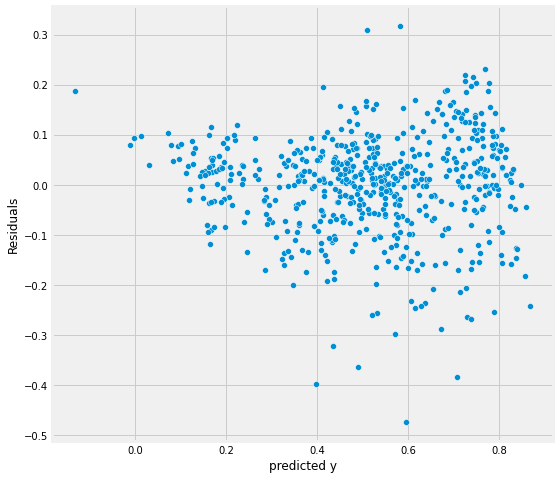

In [58]:
plt.figure(figsize=(8,8))

ax = sns.scatterplot(x=y_train_pred, y=residuals)
ax.set_xlabel('predicted y')
ax.set_ylabel('Residuals')
plt.show()

> Clearly there is no relationship with predicted variable and residuals

### Assumption 3

Error Terms have constant variance (Homoscedasticity)

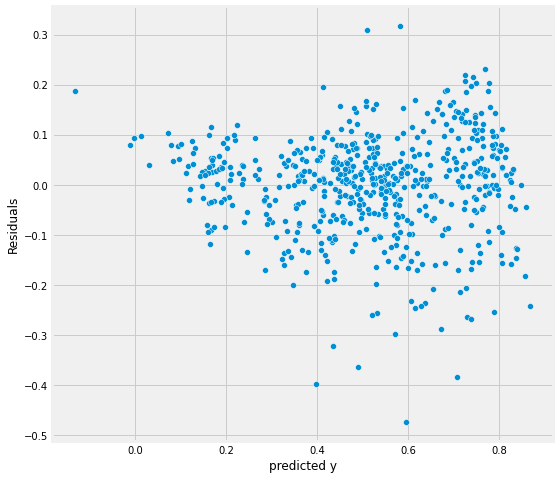

In [59]:
plt.figure(figsize=(8,8))

ax = sns.scatterplot(x=y_train_pred, y=residuals)
ax.set_xlabel('predicted y')
ax.set_ylabel('Residuals')
plt.show()


> Clearly the variance is constant except few outliners

# Model Testing

Normalizing the Test set

In [60]:
scaler = MinMaxScaler()

X_test[['atemp','windspeed','cnt']] = scaler.fit_transform(X_test[['atemp','windspeed','cnt']])

In [61]:
# Slicing Test set according to selected columns

y_test = X_test.pop('cnt')

X_test = X_test[X_train_rfe.columns]

In [62]:
X_test_lm = sm.add_constant(X_test)

# Test Prediction
y_test_pred = lr_1.predict(X_test_lm)

## R<sup>2</sup> Score   

In [63]:
# R2 score for Test Dataset

r2_score(y_true=y_test, y_pred=y_test_pred)

0.799714090234115

> Adjusted R-Squared of Train Set is `0.796`

> R-squared of Test Set is `0.79`

# Result Model

$ cnt = (0.2354 * yr)	 +   (0.4684 * atemp) - (0.0966 * windspeed)	- (spring	* 0.1218) + (winter	* 0.0396) - (july	* 0.0459) + (september * 0.0451) - (sunday	* 0.0450 ) - (Light Snow * 0.2469) + 0.2325
$

<br>
Accuracy :  80%

Top Significant features : `atemp`, `yr`, `lightsnow`